In [7]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [8]:
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00B0DCE3+50899]
	(No symbol) [0x00A9E111]
	(No symbol) [0x009A5588]
	(No symbol) [0x0098D333]
	(No symbol) [0x009EF4DB]
	(No symbol) [0x009FDB33]
	(No symbol) [0x009EB6F6]
	(No symbol) [0x009C7708]
	(No symbol) [0x009C886D]
	GetHandleVerifier [0x00D73EAE+2566302]
	GetHandleVerifier [0x00DA92B1+2784417]
	GetHandleVerifier [0x00DA327C+2759788]
	GetHandleVerifier [0x00BA5740+672048]
	(No symbol) [0x00AA8872]
	(No symbol) [0x00AA41C8]
	(No symbol) [0x00AA42AB]
	(No symbol) [0x00A971B7]
	BaseThreadInitThunk [0x75390099+25]
	RtlGetAppContainerNamedObjectPath [0x77517B6E+286]
	RtlGetAppContainerNamedObjectPath [0x77517B3E+238]


In [ ]:
#제목을 가져옴
divs = soup.select('.lister-item-content')
len(divs)

25

In [ ]:
# 밑으로 내려가기
driver.find_element(By.CSS_SELECTOR, '#load-more-trigger').click()
time.sleep(3) 

In [ ]:
# 답변 목록에서 개별 답변을 선택하고, 글을 추출하기
div =divs[0]
title =div.select_one('.title').get_text()
name=div.select_one('.text.show-more__control').get_text()

In [10]:
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
for _ in range(39):
    driver.find_element(By.CSS_SELECTOR, '#load-more-trigger').click()
    time.sleep(5)
soup = BeautifulSoup(driver.page_source, 'html.parser')
divs = soup.select('.lister-item-content')
lins = []
div =divs[0]
for div in divs:    
    title =div.select_one('.title').get_text()
    name=div.select_one('.text.show-more__control').get_text()
    lins.append({'title':title,'name':name})

In [11]:
df=pd.DataFrame(lins)
df

,title,name
0,Some birds aren't meant to be caged.\n,The Shawshank Redemption is written and direct...
1,An incredible movie. One that lives with you.\n,It is no wonder that the film has such a high ...
2,Don't Rent Shawshank.\n,I'm trying to save you money; this is the last...
3,This is How Movies Should Be Made\n,This movie is not your ordinary Hollywood flic...
4,A classic piece of unforgettable film-making.\n,"In its Oscar year, Shawshank Redemption (writt..."
...,...,...
992,The Shawshank Redemption\n,This is a classic about hope. Hope is not in p...
993,Resilience prevails.\n,"Off the hop, I don't mean to upset people with..."
994,The Reason I don't pay attention to the Oscars\n,This movie is one of the greatest I have ever ...
995,Analyzing 10 points\n,Let me analyze why people keep giving 10 point...


In [12]:
df.to_csv('data/IMDM.txt',index=False)

In [13]:
with open('data/IMDM.txt')as f:
    text =f.read()

In [14]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

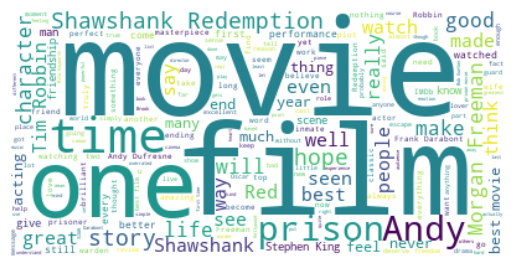

In [15]:
sw_wc =STOPWORDS
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc
    ).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()